# Alternate version of convergence rate test: $\lambda_j / K_j$

James Yu, 24 July 2022

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import *

In [2]:
def ratio(delta, c, lambda_j):
    K_j_star = ((delta + delta*c*lambda_j**2 - c) + sqrt((c-delta-delta*c*lambda_j**2)**2 + 4*delta*c)) / (2 * delta)
    return lambda_j / K_j_star

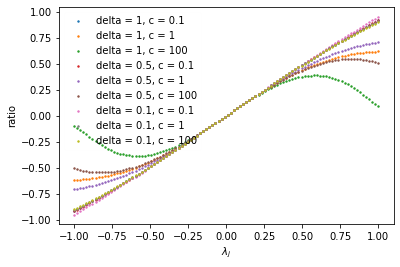

In [3]:
linsp = np.linspace(-1, 1, 100)

plt.scatter(linsp, [ratio(1, 0.1, lambda_j) for lambda_j in linsp], label = "delta = 1, c = 0.1", s = 2)
plt.scatter(linsp, [ratio(1, 1, lambda_j) for lambda_j in linsp], label = "delta = 1, c = 1", s = 2)
plt.scatter(linsp, [ratio(1, 100, lambda_j) for lambda_j in linsp], label = "delta = 1, c = 100", s = 2)

plt.scatter(linsp, [ratio(0.5, 0.1, lambda_j) for lambda_j in linsp], label = "delta = 0.5, c = 0.1", s = 2)
plt.scatter(linsp, [ratio(0.5, 1, lambda_j) for lambda_j in linsp], label = "delta = 0.5, c = 1", s = 2)
plt.scatter(linsp, [ratio(0.5, 100, lambda_j) for lambda_j in linsp], label = "delta = 0.5, c = 100", s = 2)

plt.scatter(linsp, [ratio(0.1, 0.1, lambda_j) for lambda_j in linsp], label = "delta = 0.1, c = 0.1", s = 2)
plt.scatter(linsp, [ratio(0.1, 1, lambda_j) for lambda_j in linsp], label = "delta = 0.1, c = 1", s = 2)
plt.scatter(linsp, [ratio(0.1, 100, lambda_j) for lambda_j in linsp], label = "delta = 0.1, c = 100", s = 2)
plt.legend(framealpha = 0.01)
plt.xlabel("$\lambda_j$")
plt.ylabel("ratio")
plt.show()

The function does not appear to be increasing everywhere, which is what we would need.

In [4]:
delta, c, lambda_j = symbols("delta c lambda_j")
rho = ratio(delta, c, lambda_j)
rho

2*delta*lambda_j/(c*delta*lambda_j**2 - c + delta + sqrt(4*c*delta + (-c*delta*lambda_j**2 + c - delta)**2))

In [5]:
deriv = simplify(diff(rho, lambda_j))
deriv

2*delta*(-2*c*delta*lambda_j**2 + sqrt(4*c*delta + (c*delta*lambda_j**2 - c + delta)**2))/(sqrt(4*c*delta + (c*delta*lambda_j**2 - c + delta)**2)*(c*delta*lambda_j**2 - c + delta + sqrt(4*c*delta + (c*delta*lambda_j**2 - c + delta)**2)))

Consider the edge case of the plot where we observe the function to be decreasing:

In [6]:
deriv.subs(delta, 1).subs(lambda_j, 1)

2*(-2*c + sqrt(4*c + 1))/(sqrt(4*c + 1)*(sqrt(4*c + 1) + 1))

In [7]:
deriv.subs(delta, 1).subs(lambda_j, 1).subs(c, 1.0)

0.0652475842498528

In [8]:
deriv.subs(delta, 1).subs(lambda_j, 1).subs(c, 100)

2*sqrt(401)*(-200 + sqrt(401))/(401*(1 + sqrt(401)))

In [9]:
deriv.subs(delta, 1).subs(lambda_j, 1).subs(c, 100.0) # pass as decimal to get decimal output

-0.854937461083604

Here we can see that when the magnitude of the $-2c$ term exceeds the $\sqrt{4c+1}$ term (which it does due to being a higher order polynomial), the derivative's sign is reversed (given $\delta = 1, \lambda_j = 1$). Hence, high $c$ changes the derivative's sign.